In [166]:
import numpy as np
import matplotlib.pyplot as plt
import os

import sys
sys.path.append("..")
from common import *
# from common import plot_range
import matplotlib.colors as c
from itertools import product
import pandas as pd

## Ablation study

In [167]:
prfix = "../results/abl_extra/"
fkm_orig = np.load(f'{prfix}/k-means++_drop1_wagg1/local_iter1.npy')

settings = {
    "init" : ['k-means++', 'random'], #initialize with k-means++ or random initialization
    "drop" : [0, 1], # whether to drop empty clusters or not
    "wagg" : [0, 1], # whether to do weighted aggregation or not
    "iter" : [1, 10, 20, 40, 80, 100] # amount of local iterations
}
    
keys, values = zip(*settings.items())
df = pd.DataFrame([list(p) for p in product(*values)], columns = keys)
# df['results'] = np.zeros(df.shape[0])

all_results = []
for index, row in df.iterrows():
    filename = f'{row["init"]}_drop{row["drop"]}_wagg{row["wagg"]}/local_iter{row["iter"]}.npy'
    result = np.load(prfix + filename)
    all_results.append(result)

df['results'] = all_results

In [59]:
df.head()

,init,drop,wagg,iter,results
0,k-means++,0,0,1,"[[0.95718524, 0.96133773, 0.96133773, 0.961337..."
1,k-means++,0,0,10,"[[0.95072948, 0.95053031, 0.95736599, 0.957365..."
2,k-means++,0,0,20,"[[0.96154971, 0.95739479, 0.96133773, 0.961337..."
3,k-means++,0,0,40,"[[0.95722032, 0.95742988, 0.95742988, 0.957429..."
4,k-means++,0,0,80,"[[0.95488963, 0.96133773, 0.96133773, 0.961337..."


In [147]:
def query_df(df, query):
    for key in query:
        df = df.loc[df[key] == query[key]]
    return df

### effect of local iterations

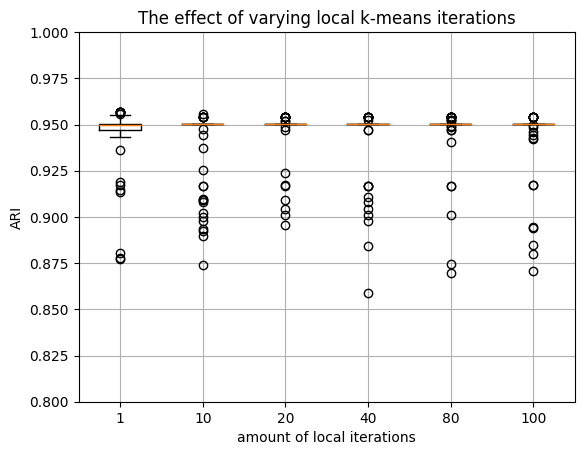

In [168]:
query = {
    "init" : "k-means++",
    "drop" : 1,
    "wagg" : 1,
}
df_iter = query_df(df, query)

# iter_final_results = np.array([arr[:,-1] for arr in df_iter['results'].values])

for index, row in df_iter.iterrows():
    row_result = row['results']
    plt.boxplot(row_result[:,-1], positions = [index], widths = 0.5)
    
plt.xticks(df_iter.index, df_iter['iter'].values)
plt.ylim([0.8, 1])
plt.xlabel("amount of local iterations")
plt.ylabel("ARI")
plt.title("The effect of varying local k-means iterations")
plt.grid()

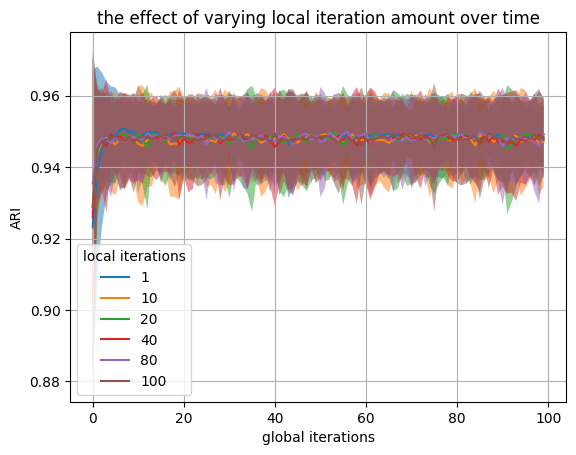

In [169]:
for index, row in df_iter.iterrows():
    row_result = row['results']
    plot_range(row_result, label = row['iter'])
#     plt.boxplot(row_result[:,-1], positions = [index], widths = 0.5)
plt.legend(title = "local iterations")
plt.xlabel("global iterations")
plt.ylabel("ARI")
plt.title("the effect of varying local iteration amount over time")
plt.grid()

### Effect of initialization

0.9476429394000001
0.9478163820500001


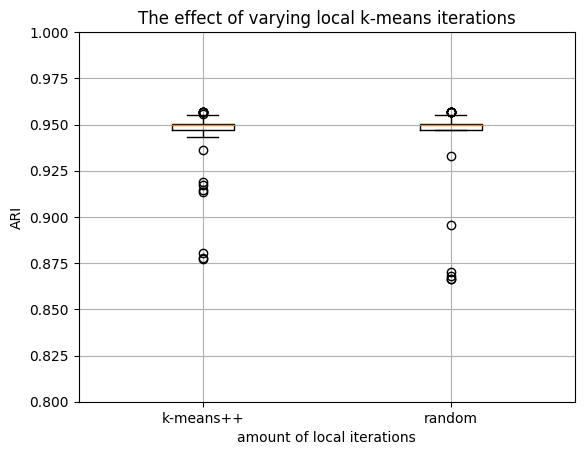

In [170]:
query = {
#     "init" : "k-means++",
    "drop" : 1,
    "wagg" : 1,
    "iter" : 1
}
df_init = query_df(df, query)

for i, (index, row) in enumerate(df_init.iterrows()):
    row_result = row['results']
    plt.boxplot(row_result[:,-1], positions = [i], widths = 0.25)
    print(np.average(row_result[:,-1]))

plt.xticks([0, 1], df_init['init'].values)
plt.ylim([0.8, 1])
plt.xlabel("amount of local iterations")
plt.ylabel("ARI")
plt.title("The effect of varying local k-means iterations")
plt.grid()

### effect of weighted aggregation

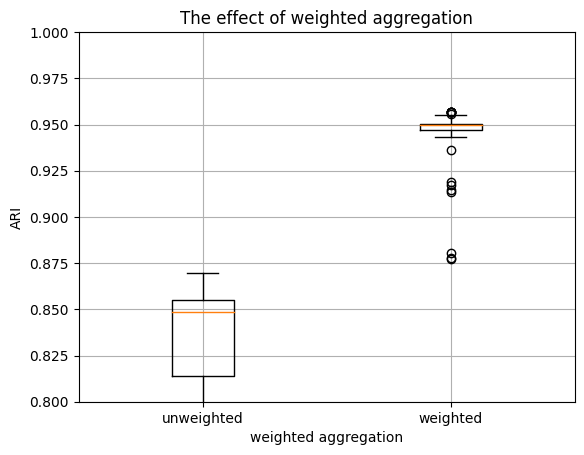

In [171]:
query = {
    "init" : "k-means++",
    "drop" : 1,
#     "wagg" : 1,
    "iter" : 1
}
df_agg = query_df(df, query)

for i, (index, row) in enumerate(df_agg.iterrows()):
    row_result = row['results']
    plt.boxplot(row_result[:,-1], positions = [i], widths = 0.25)
#     print(np.average(row_result[:,-1]))
    
plt.xticks([0, 1], ['unweighted', "weighted"])
plt.ylim([0.8, 1])
plt.xlabel("weighted aggregation")
plt.ylabel("ARI")
plt.title("The effect of weighted aggregation")
plt.grid()

### effect of dropping empty clusters

0.9295405377
0.9476429394000001


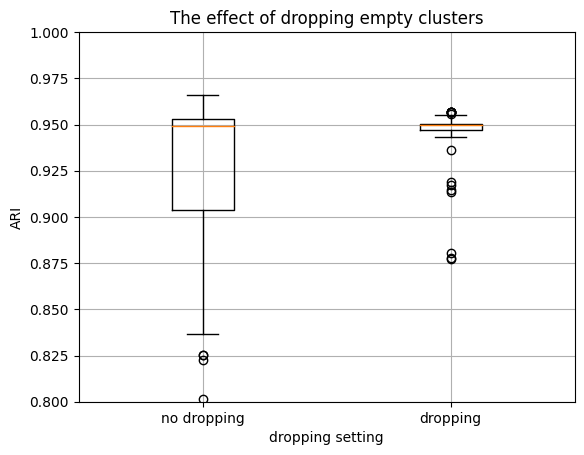

In [172]:
query = {
    "init" : "k-means++",
#     "drop" : 1,
    "wagg" : 1,
    "iter" : 1
}
df_drop = query_df(df, query)

for i, (index, row) in enumerate(df_drop.iterrows()):
    row_result = row['results']
    plt.boxplot(row_result[:,-1], positions = [i], widths = 0.25)
    print(np.average(row_result[:,-1]))
    
plt.xticks([0, 1], ['no dropping', "dropping"])
plt.ylim([0.8, 1])
plt.xlabel("dropping setting")
plt.ylabel("ARI")
plt.title("The effect of dropping empty clusters")
plt.grid()

### "worst-case" scenario

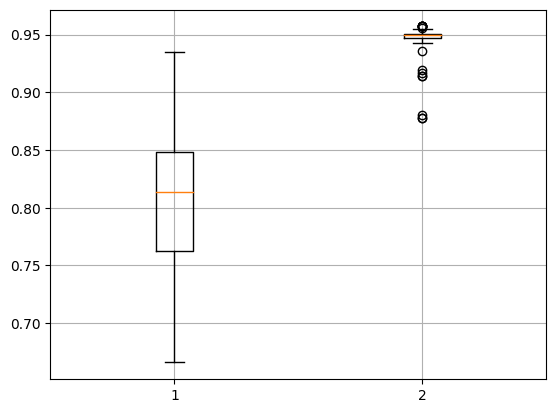

In [173]:
query = {
    "init" : "random",
    "drop" : 0,
    "wagg" : 0,
    "iter" : 1
}

wc_df = query_df(df, query)

plt.boxplot(wc_df['results'].values[0][:,-1], positions = [1])
plt.boxplot(fkm_orig[:,-1], positions = [2])
plt.grid()

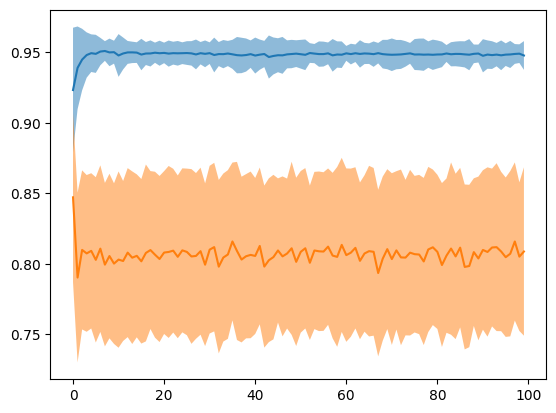

In [174]:
plot_range(fkm_orig)
plot_range(wc_df['results'].values[0])

In [137]:
wc_df['results'].values[0].shape

(200, 100)

# Synthetic, original

In [2]:
cent_orig = np.genfromtxt("results/cent_synth_orig.csv", delimiter = ",")
om_orig = np.genfromtxt("results/om_synth_orig.csv", delimiter = ",")
ds_orig = np.genfromtxt("results/ds_synth_orig.csv", delimiter = ",")
ds_untuned_orig = np.genfromtxt("results/ds_synth_orig_untuned.csv", delimiter = ",")
V2_beta01_50ppc = np.load("results/abl_beta0.1_ppc_50.npy")
V2_beta1_50ppc = np.load("results/abl_beta1_ppc_50.npy")
V2_beta10_50ppc = np.load("results/abl_beta10_ppc_50.npy")
V2_beta01_100ppc = np.load("results/abl_beta0.1_ppc_100.npy")

In [3]:
V2_beta01_50ppc.shape

(200, 100, 6)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdb32aab810>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdb32aabe10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdb32aab4d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdb32ab9510>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdb32ab9850>],
 'means': []}

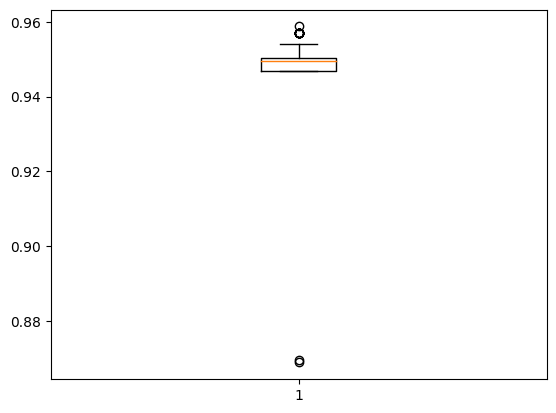

In [4]:
plt.boxplot(V2_beta01_50ppc[:,-1,0])

In [5]:
V2_toPlot = np.array([V2_beta01_50ppc[:, -1, 0], V2_beta1_50ppc[:, -1, 0], V2_beta10_50ppc[:, -1, 0]])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


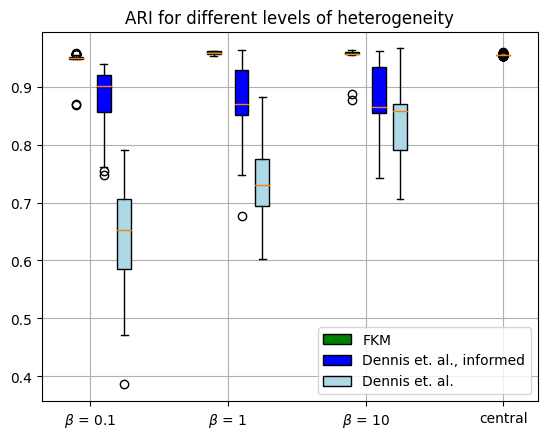

In [6]:
#bp2 = plt.boxplot(om_orig, positions = [-0.5, 1.5, 3.5], widths = 0.2, patch_artist = True, boxprops=dict(facecolor="red"))
bp4 = plt.boxplot(V2_toPlot.T, positions = [-0.2, 1.8, 3.8], widths = 0.2, patch_artist = True, boxprops=dict(facecolor="green"))
bp1 = plt.boxplot(ds_orig, positions = [0.2, 2.2, 4.2], widths = 0.2, patch_artist = True, boxprops=dict(facecolor="blue"))
bp3 = plt.boxplot(cent_orig[:,0], positions = [6], widths = 0.2, patch_artist = True, boxprops=dict(facecolor="purple"))
bp5 = plt.boxplot(ds_untuned_orig, positions = [0.5, 2.5,4.5], widths = 0.2, patch_artist = True, boxprops=dict(facecolor="lightblue"))
#plt.ylim([0.7, 1])
plt.xticks([0, 2, 4, 6], [r"$\beta$ = 0.1",r"$\beta$ = 1",r"$\beta$ = 10", "central"])
plt.grid(True)
plt.legend([bp4['boxes'][0], bp1['boxes'][0], bp5['boxes'][0] ], ["FKM", "Dennis et. al., informed", "Dennis et. al."])
plt.title("ARI for different levels of heterogeneity")
plt.savefig("synth_orig_V2.eps",format = "eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


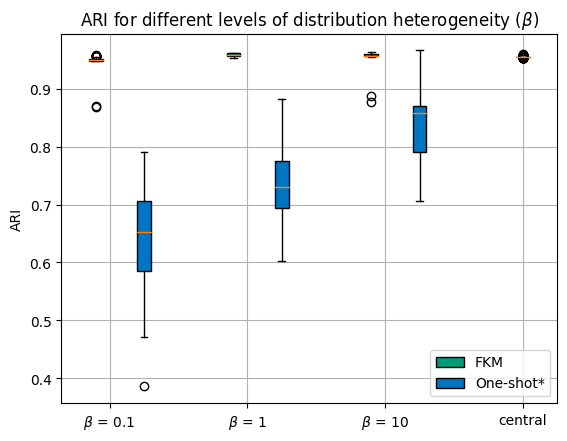

In [26]:
fkm_color = tuple(ti/255 for ti in(0, 155, 119)) 
den_color = tuple(ti/255 for ti in (0, 118, 194) )
#bp2 = plt.boxplot(om_orig, positions = [-0.5, 1.5, 3.5], widths = 0.2, patch_artist = True, boxprops=dict(facecolor="red"))
bp4 = plt.boxplot(V2_toPlot.T, positions = [-0.2, 1.8, 3.8], widths = 0.2, patch_artist = True, boxprops=dict(facecolor=fkm_color))
# bp1 = plt.boxplot(ds_orig, positions = [0.2, 2.2, 4.2], widths = 0.2, patch_artist = True, boxprops=dict(facecolor="blue"))
bp3 = plt.boxplot(cent_orig[:,0], positions = [6], widths = 0.2, patch_artist = True, boxprops=dict(facecolor="purple"))
bp5 = plt.boxplot(ds_untuned_orig, positions = [0.5, 2.5,4.5], widths = 0.2, patch_artist = True, boxprops=dict(facecolor=den_color))
#plt.ylim([0.7, 1])
plt.xticks([0, 2, 4, 6], [r"$\beta$ = 0.1",r"$\beta$ = 1",r"$\beta$ = 10", "central"])
plt.grid(True)
plt.legend([bp4['boxes'][0], bp5['boxes'][0] ], ["FKM", "One-shot*"])
plt.title(r"ARI for different levels of distribution heterogeneity ($\beta$)")
plt.ylabel("ARI")
plt.savefig("synth_orig_poster.eps",format = "eps")

In [16]:
#V2_abl = np.load("results/abl_V2.npy")
central_abl = np.load("results/scores_central_abl.npy")
DS_abl = np.load("results/abl_DS.npy")
V2_n1_b01_20r = np.load("results/b01_n1_20rounds200ppc.npy")
V2_n15_b01_20r = np.load("results/b01_n15_20rounds_200ppc.npy")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


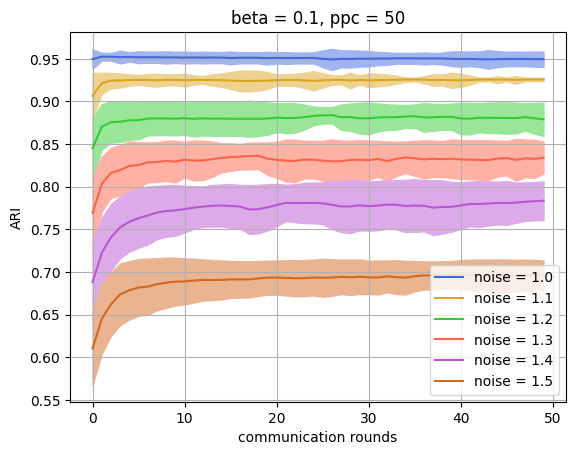

In [5]:
#plot_range(V2_abl[:,:,2,2,0].T, label = "noise = 1")
colors = ["royalblue", "goldenrod", "limegreen", "tomato", "mediumorchid", "chocolate"]
for i in range(V2_beta01_50ppc.shape[-1]):
    label = "noise = " + str(1 + 0.1*i)
    plot_range(V2_beta01_50ppc[:,0:50,i], label = label, convert = True, color = colors[i])
#plot_range(V2_abl[:,:,2,2,5].T, label = "noise = 1.5")
#plot_range(V2_beta01_50ppc[:,0:50,-1], label = "noise = 1.5")
plt.grid(True)
plt.xlabel("communication rounds")
plt.ylabel("ARI")
plt.legend()
plt.title("beta = 0.1, ppc = 50")
plt.savefig("convergence_b01_ppc50.eps",format = "eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


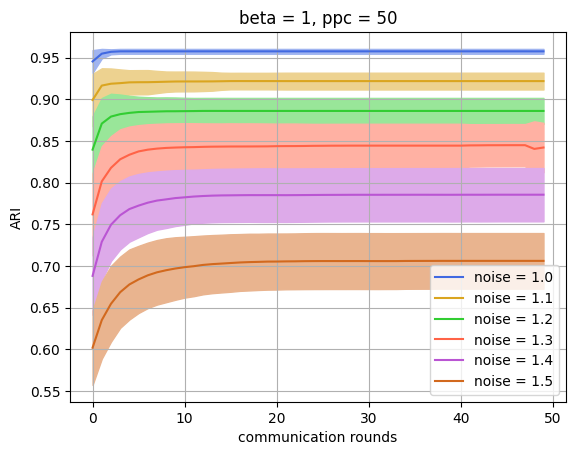

In [7]:
colors = ["royalblue", "goldenrod", "limegreen", "tomato", "mediumorchid", "chocolate"]

#plot_range(V2_abl[:,:,2,2,0].T, label = "noise = 1")
for i in range(V2_beta1_50ppc.shape[-1]):
    label = "noise = " + str(1 + 0.1*i)
    plot_range(V2_beta1_50ppc[:,0:50,i], label = label, color = colors[i], convert=True)
#plot_range(V2_abl[:,:,2,2,5].T, label = "noise = 1.5")
#plot_range(V2_beta01_50ppc[:,0:50,-1], label = "noise = 1.5")
plt.grid(True)
plt.xlabel("communication rounds")
plt.ylabel("ARI")
plt.legend()
plt.title("beta = 1, ppc = 50")
plt.savefig("convergence_b1_ppc50.eps",format = "eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


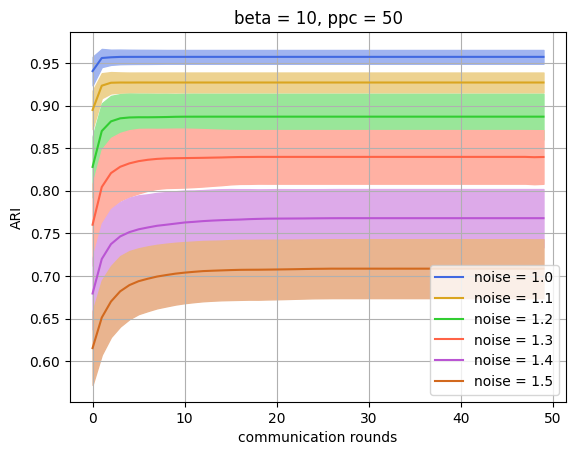

In [9]:
colors = ["royalblue", "goldenrod", "limegreen", "tomato", "mediumorchid", "chocolate"]

#plot_range(V2_abl[:,:,2,2,0].T, label = "noise = 1")
for i in range(V2_beta10_50ppc.shape[-1]):
    label = "noise = " + str(1 + 0.1*i)
    plot_range(V2_beta10_50ppc[:,0:50,i], label = label, color = colors[i], convert = True)
#plot_range(V2_abl[:,:,2,2,5].T, label = "noise = 1.5")
#plot_range(V2_beta01_50ppc[:,0:50,-1], label = "noise = 1.5")
plt.grid(True)
plt.xlabel("communication rounds")
plt.ylabel("ARI")
plt.legend()
plt.title("beta = 10, ppc = 50")
plt.savefig("convergence_beta10_ppc50.eps",format = "eps")

In [12]:
V2_50ppc = np.stack([V2_beta01_50ppc, V2_beta1_50ppc, V2_beta10_50ppc], axis = 3)

In [25]:
V2_beta01.shape

(200, 100, 6)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


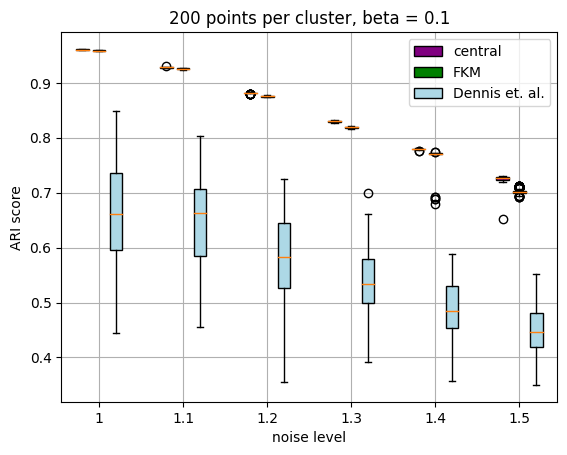

In [17]:
betas = [0.1, 1, 10]
ppcs = [50, 100, 200]
ppc_i = 2
noise_i = 0
beta_i = 0
V2_file = np.load("results/abl_beta" + str(betas[beta_i]) + "_ppc_" + str(ppcs[ppc_i]) + ".npy")

bp1 = plt.boxplot(central_abl[:,ppc_i, :], positions = [-0.4,1.6,3.6,5.6,7.6, 9.6], widths = 0.3, patch_artist = True, boxprops=dict(facecolor="purple"))
bp2 = plt.boxplot(V2_file[:,-1,:], positions = [0, 2, 4, 6, 8, 10],widths = 0.3, patch_artist = True, boxprops=dict(facecolor="green"))
bp3 = plt.boxplot(DS_abl[:,beta_i, ppc_i, :], positions = [0.4, 2.4, 4.4, 6.4, 8.4, 10.4], widths = 0.3, patch_artist = True, boxprops=dict(facecolor="lightblue"))
plt.grid(True)
plt.xticks([0, 2, 4, 6, 8, 10], [1, 1.1, 1.2, 1.3, 1.4, 1.5])
plt.xlabel("noise level")
plt.ylabel("ARI score")
plt.title(str(ppcs[ppc_i]) + " points per cluster, beta = " + str(betas[beta_i]))
plt.legend([bp1['boxes'][0], bp2['boxes'][0], bp3['boxes'][0]], ["central", 'FKM', "Dennis et. al."])
plt.savefig(str(ppcs[ppc_i]) + "ppc_b"+str(betas[beta_i]) + "_noises.eps",format = "eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


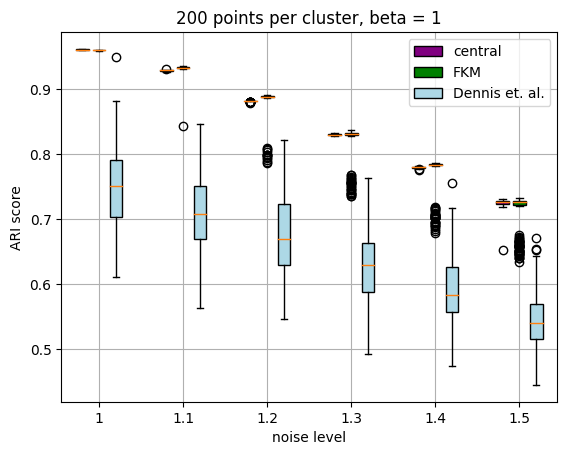

In [18]:
betas = [0.1, 1, 10]
ppcs = [50, 100, 200]
ppc_i = 2
noise_i = 0
beta_i = 1
V2_file = np.load("results/abl_beta" + str(betas[beta_i]) + "_ppc_" + str(ppcs[ppc_i]) + ".npy")

bp1 = plt.boxplot(central_abl[:,ppc_i, :], positions = [-0.4,1.6,3.6,5.6,7.6, 9.6], widths = 0.3, patch_artist = True, boxprops=dict(facecolor="purple"))
bp2 = plt.boxplot(V2_file[:,-1,:], positions = [0, 2, 4, 6, 8, 10],widths = 0.3, patch_artist = True, boxprops=dict(facecolor="green"))
bp3 = plt.boxplot(DS_abl[:,beta_i, ppc_i, :], positions = [0.4, 2.4, 4.4, 6.4, 8.4, 10.4], widths = 0.3, patch_artist = True, boxprops=dict(facecolor="lightblue"))
plt.grid(True)
plt.xticks([0, 2, 4, 6, 8, 10], [1, 1.1, 1.2, 1.3, 1.4, 1.5])
plt.xlabel("noise level")
plt.ylabel("ARI score")
plt.title(str(ppcs[ppc_i]) + " points per cluster, beta = " + str(betas[beta_i]))
plt.legend([bp1['boxes'][0], bp2['boxes'][0], bp3['boxes'][0]], ["central", 'FKM', "Dennis et. al."])
plt.savefig(str(ppcs[ppc_i]) + "ppc_b"+str(betas[beta_i]) + "_noises.eps",format = "eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


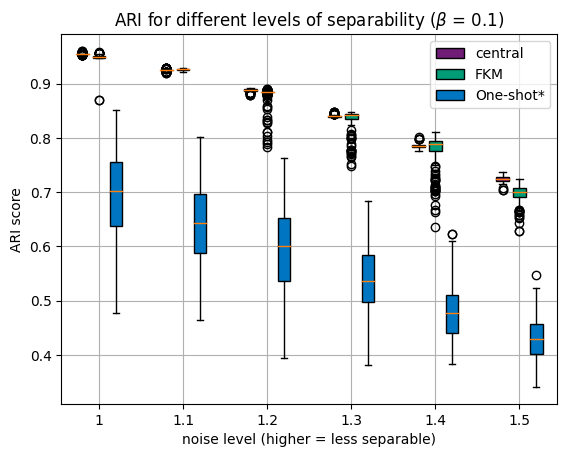

In [27]:
fkm_color = tuple(ti/255 for ti in(0, 155, 119)) 
den_color = tuple(ti/255 for ti in (0, 118, 194) )
cent_color = tuple(ti/255 for ti in (111, 29, 119))
betas = [0.1, 1, 10]
ppcs = [50, 100, 200]
ppc_i = 0
noise_i = 0
beta_i = 0
V2_file = np.load("results/abl_beta" + str(betas[beta_i]) + "_ppc_" + str(ppcs[ppc_i]) + ".npy")


bp1 = plt.boxplot(central_abl[:,ppc_i, :], positions = [-0.4,1.6,3.6,5.6,7.6, 9.6], widths = 0.3, patch_artist = True, boxprops=dict(facecolor=cent_color))
bp2 = plt.boxplot(V2_file[:,-1,:], positions = [0, 2, 4, 6, 8, 10],widths = 0.3, patch_artist = True, boxprops=dict(facecolor=fkm_color))
bp3 = plt.boxplot(DS_abl[:,beta_i, ppc_i, :], positions = [0.4, 2.4, 4.4, 6.4, 8.4, 10.4], widths = 0.3, patch_artist = True, boxprops=dict(facecolor=den_color))
plt.grid(True)
plt.xticks([0, 2, 4, 6, 8, 10], [1, 1.1, 1.2, 1.3, 1.4, 1.5])
plt.xlabel("noise level (higher = less separable)")
plt.ylabel("ARI score")
# plt.title(str(ppcs[ppc_i]) + " points per cluster, beta = " + str(betas[beta_i]))
plt.title(r"ARI for different levels of separability ($\beta$ = 0.1)")
plt.legend([bp1['boxes'][0], bp2['boxes'][0], bp3['boxes'][0]], ["central",'FKM', "One-shot*"])
plt.savefig(str(ppcs[ppc_i]) + "ppc_b"+str(betas[beta_i]) + "_noises_poster.eps",format = "eps")

# Synthetic, different distribution per client

In [13]:
cent_ci = np.genfromtxt("results/cent_synth_ci.csv", delimiter = ",")
om_ci = np.load("results/cluster_wise.npy")
ds_ci = np.genfromtxt("results/ds_synth_ci.csv", delimiter = ",")

In [44]:
om_ci.shape

(200, 100)

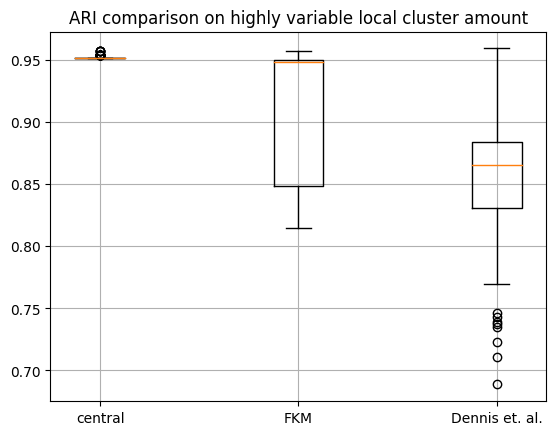

In [22]:
plt.boxplot(cent_ci, widths = 0.5,positions = [0])
plt.boxplot(om_ci[:,-1], widths = 0.5, positions = [2])
#plt.boxplot(V2_ci_w[-1, :], widths = 0.5,positions = [2])
plt.boxplot(ds_ci, widths = 0.5, positions = [4])
plt.xticks([0, 2, 4], ["central", "FKM",  "Dennis et. al.", ])
plt.grid(True)
plt.title("ARI comparison on highly variable local cluster amount")
plt.savefig("ci_results_V2.eps",format = "eps")

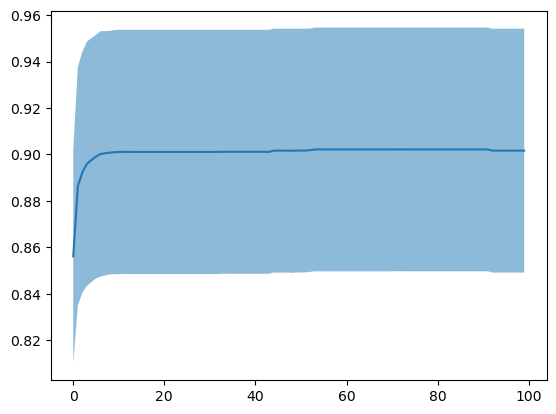

In [52]:
plot_range(om_ci)

# Synthetic, non-uniform

In [16]:
cent_sd = np.genfromtxt("results/cent_synth_sd.csv", delimiter = ",")
om_sd_natT = np.genfromtxt("results/om_synth_sd_natT.csv", delimiter = ",")
om_sd_t1 = np.genfromtxt("results/om_synth_sd_t1.csv", delimiter = ",")
ds_sd = np.genfromtxt("results/ds_synth_sd.csv", delimiter = ",")


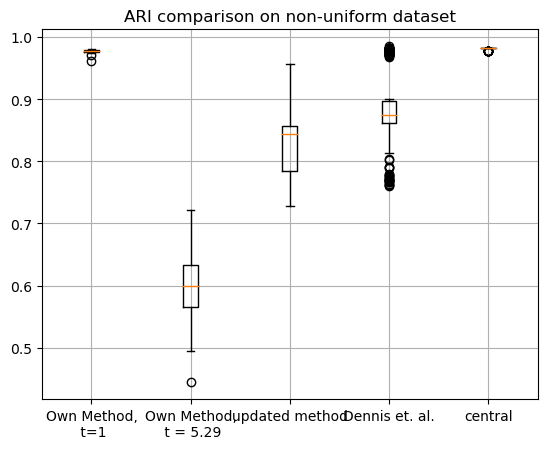

In [17]:
plt.boxplot(om_sd_t1[-1,:], positions = [0])
plt.boxplot(om_sd_natT[-1,:], positions = [1])
plt.boxplot(om_V2_sd[-1, :], positions = [2])
plt.boxplot(ds_sd, positions = [3])
plt.boxplot(cent_sd, positions = [4])
plt.xticks([0, 1, 2, 3, 4], ["Own Method,\n t=1", "Own Method,\n t = 5.29", "updated method",  "Dennis et. al.","central"])
plt.grid(True)
plt.title("ARI comparison on non-uniform dataset")
plt.savefig("non_uniform_results.eps",format = "eps")

# FEMNIST

In [8]:
cent_fn = np.genfromtxt("results/femnist_cent_silh.csv", delimiter = ",")
cent_ssilh = np.genfromtxt("results/femnist_cent_ssilh.csv", delimiter = ",")
om_fn_natT = np.genfromtxt("results/femnist_om_natt.csv", delimiter = ",")
om_fn_tuned = np.genfromtxt("results/femnist_om.csv", delimiter = ",")
ds_fn_silh = np.genfromtxt("results/femnist_ds_silh.csv", delimiter = ",")
ds_fn_ssilh = np.genfromtxt("results/femnist_ds_ssilh.csv", delimiter = ",")


ds_fn_untuned = np.genfromtxt("results/femnist_ds_untuned.csv", delimiter = ",")

ds_fn_untuned_silh = np.genfromtxt("results/femnist_ds_untuned_silh.csv", delimiter = ",")
ds_fn_untuned_ssilh = np.genfromtxt("results/femnist_ds_untuned_ssilh.csv", delimiter = ",")


fn_V2 = np.genfromtxt("results/FEMNIST_V3.csv", delimiter = ",")
fn_silh = fn_V2[1:, 0]
fn_ssilh = fn_V2[1:,1]

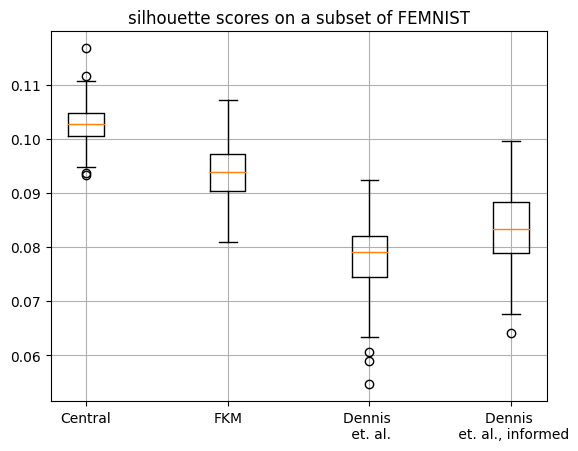

In [11]:
plt.boxplot([cent_fn, fn_silh, ds_fn_untuned_silh,  ds_fn_silh], positions = [0,2,4, 6])
plt.xticks([0,2,4, 6],["Central", "FKM", "Dennis \n et. al.", "Dennis \n et. al., informed"])
plt.title("silhouette scores on a subset of FEMNIST")
plt.grid(True)
plt.savefig("FEMNIST_silh_V2.eps",format = "eps")

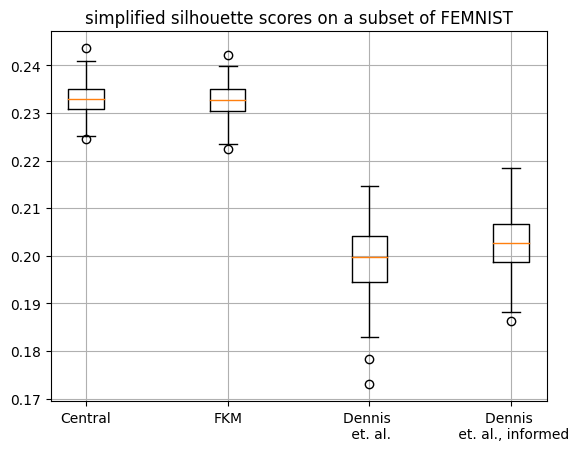

In [12]:
plt.boxplot([cent_ssilh, fn_ssilh, ds_fn_untuned_ssilh,  ds_fn_ssilh], positions = [0,2,4, 6])
plt.xticks([0,2,4, 6],["Central", "FKM", "Dennis \n et. al.", "Dennis \n et. al., informed"])
plt.title("simplified silhouette scores on a subset of FEMNIST")
plt.grid(True)
plt.savefig("FEMNIST_ssilh_V2.eps",format = "eps")

# Dset visualizations

Text(0.5, 1.0, 'distribution of the non-uniform dataset')

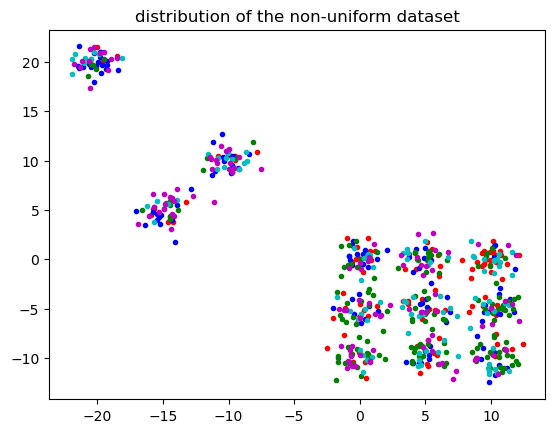

In [3]:
colors = ['r', 'b', 'g', 'c', 'm']
for i in range(5):
    data, labels = load_data(i, "super_diag")
    plt.plot(data[:,0], data[:,1],".", color = colors[i])
plt.title("distribution of the non-uniform dataset")
#plt.grid(True)
#plt.savefig("non_uniform_dist.eps",format = "eps")

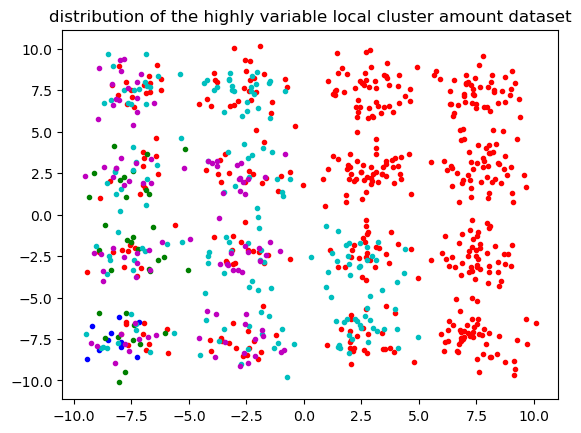

In [56]:
colors = ['r', 'b', 'g', 'c', 'm']
for i in range(5):
    data, labels = load_data(i, "cluster_wise")
    plt.plot(data[:,0], data[:,1],".", color = colors[i])
plt.title("distribution of the highly variable local cluster amount dataset")
plt.savefig("ci_dist.eps",format = "eps")

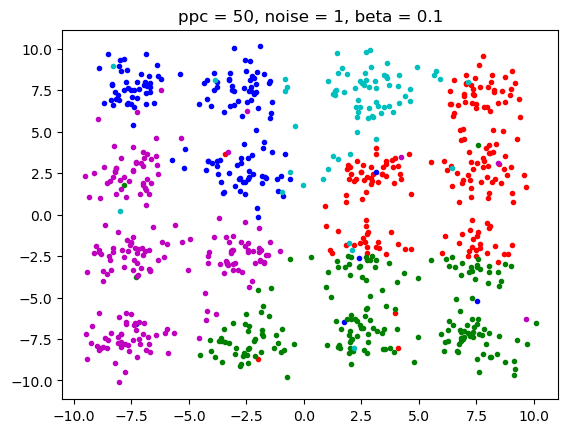

In [48]:
colors =  ['r', 'b', 'g', 'c', 'm']
noise = 1
ppc = 50
beta = 0.1
for i in range(5):
    data, labels = load_data(i, "abl", beta=beta, ppc=ppc, noise=noise)
    plt.plot(data[:,0], data[:,1],".", color = colors[i])
plt.title("ppc = " +  str(ppc) + ", noise = "+ str(noise) + ", beta = "+ str(beta))
plt.savefig("50ppc_b01_n1_dist.eps",format = "eps")

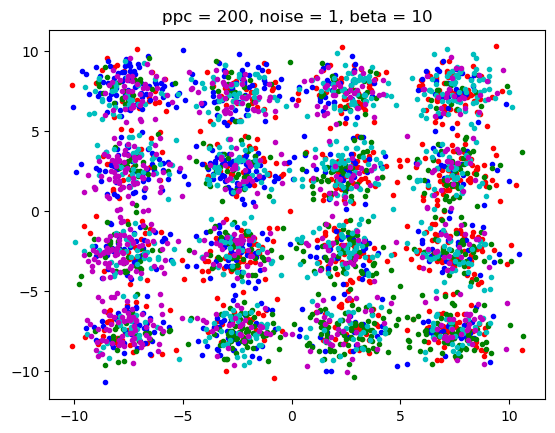

In [49]:
colors =  ['r', 'b', 'g', 'c', 'm']
noise = 1
ppc = 200
beta = 10
for i in range(5):
    data, labels = load_data(i, "abl", beta=beta, ppc=ppc, noise=noise)
    plt.plot(data[:,0], data[:,1],".", color = colors[i])
plt.title("ppc = " +  str(ppc) + ", noise = "+ str(noise) + ", beta = "+ str(beta))
plt.savefig("abl_ppc" + str(ppc) + "_noise" + str(noise) + "beta" + str(beta) + "_dist.eps",format = "eps")